# 🖼️ Image Processing Toolkit (OpenCV + Streamlit)

### Module 1 – Image Processing Fundamentals & Computer Vision

This notebook demonstrates the **backend logic** of the GUI-based image processing toolkit implemented in `app.py`.

It covers fundamental operations step by step:
- Image Info
- Color Conversions
- Transformations
- Filtering & Morphology
- Enhancement
- Edge Detection
- Compression & File Handling

---

## 1. Setup & Imports
We start by importing the required libraries: OpenCV, NumPy, Pillow, and Matplotlib (for visualization).

In [2]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Utility function to display images side by side
def show_images(img1, img2, title1="Original", title2="Processed"):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    plt.title(title1)
    plt.axis('off')

    plt.subplot(1,2,2)
    if len(img2.shape) == 2:
        plt.imshow(img2, cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
    plt.title(title2)
    plt.axis('off')
    plt.show()

## 2. Load Image & Info
We load an image, convert it to a NumPy array, and display basic information such as dimensions and color channels.

Image Shape: (735, 500, 3)
Height, Width, Channels: (735, 500, 3)
Data Type: uint8


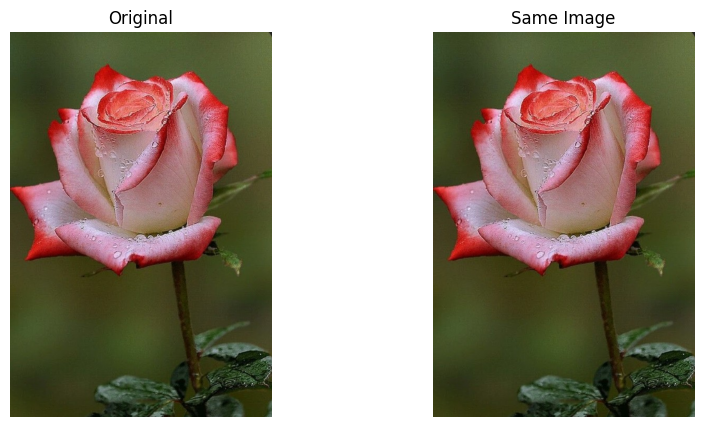

In [3]:
img = cv2.imread('sample.jpg')  # Replace with your image path
print("Image Shape:", img.shape)
print("Height, Width, Channels:", img.shape)
print("Data Type:", img.dtype)
show_images(img, img, "Original", "Same Image")

## 3. Color Conversions
- RGB ↔ Grayscale
- RGB ↔ HSV
- RGB ↔ YCbCr

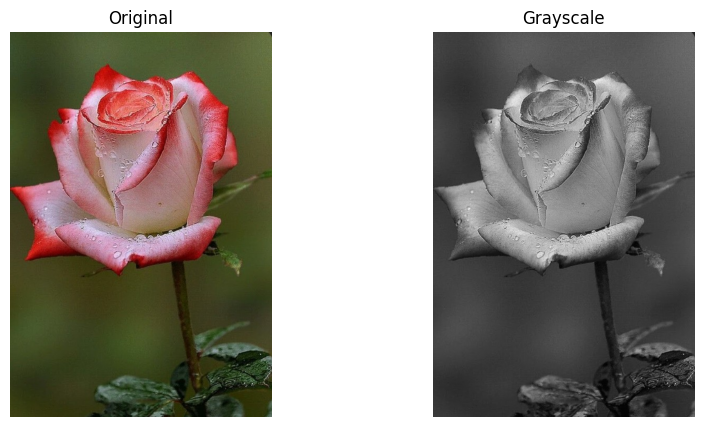

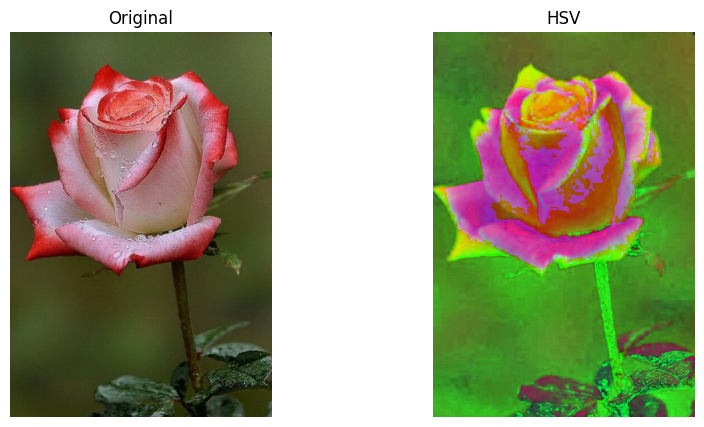

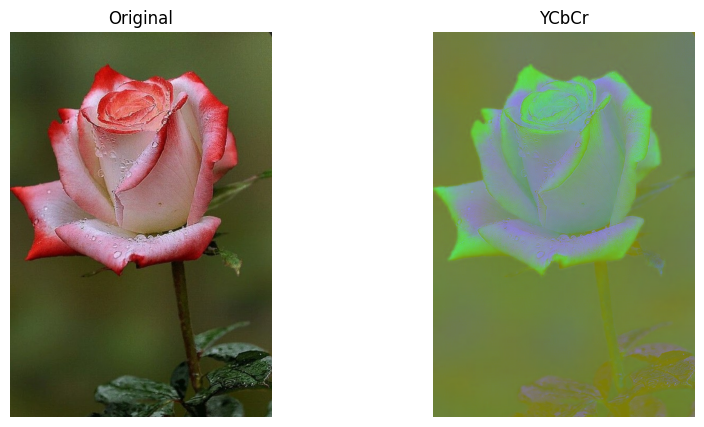

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
ycbcr = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)

show_images(img, gray, "Original", "Grayscale")
show_images(img, hsv, "Original", "HSV")
show_images(img, ycbcr, "Original", "YCbCr")

## 4. Transformations
Operations: Rotation, Scaling, Translation, Affine, Perspective.

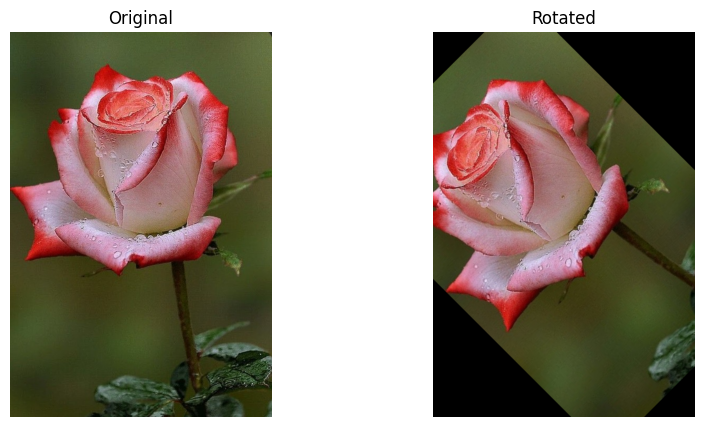

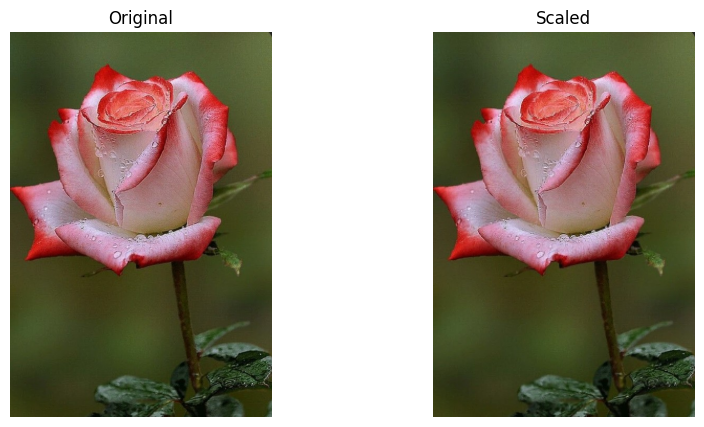

In [5]:
# Rotation
(h, w) = img.shape[:2]
M = cv2.getRotationMatrix2D((w//2, h//2), 45, 1.0)
rotated = cv2.warpAffine(img, M, (w, h))

# Scaling
scaled = cv2.resize(img, None, fx=0.5, fy=0.5)

show_images(img, rotated, "Original", "Rotated")
show_images(img, scaled, "Original", "Scaled")

## 5. Filtering & Morphology
We demonstrate Gaussian Blur, Median filter, and Sobel edge filtering.

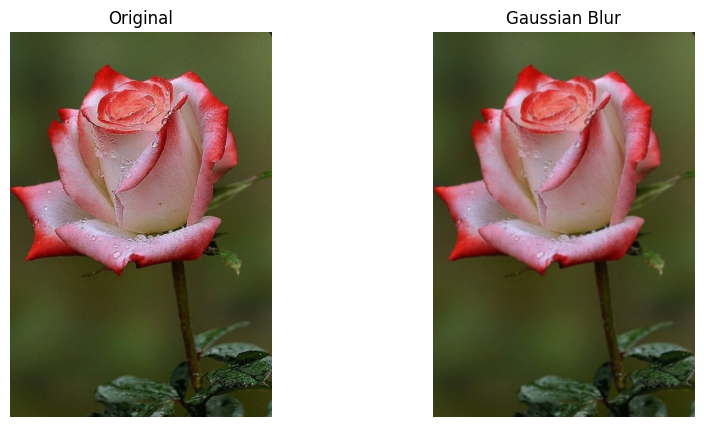

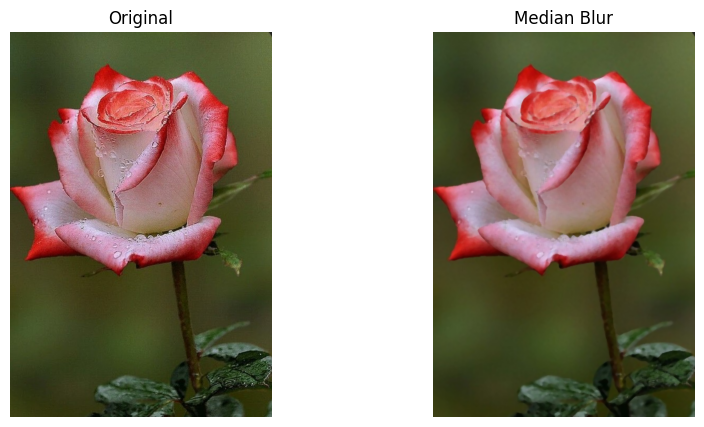

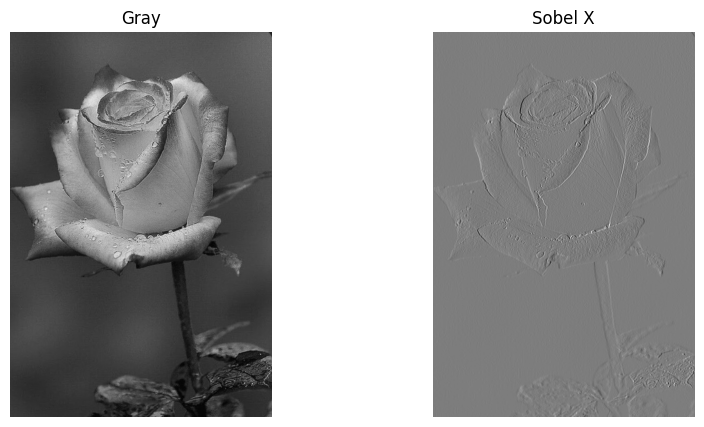

In [6]:
gaussian = cv2.GaussianBlur(img, (5,5), 0)
median = cv2.medianBlur(img, 5)
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)

show_images(img, gaussian, "Original", "Gaussian Blur")
show_images(img, median, "Original", "Median Blur")
show_images(gray, sobelx, "Gray", "Sobel X")

## 6. Enhancement
- Histogram Equalization
- Sharpening (Unsharp Mask)

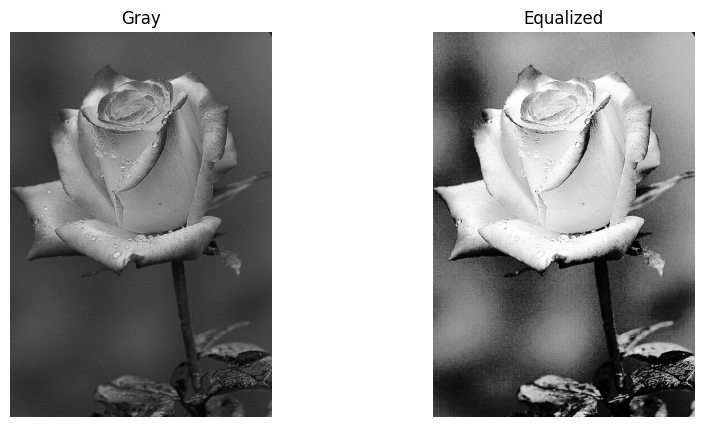

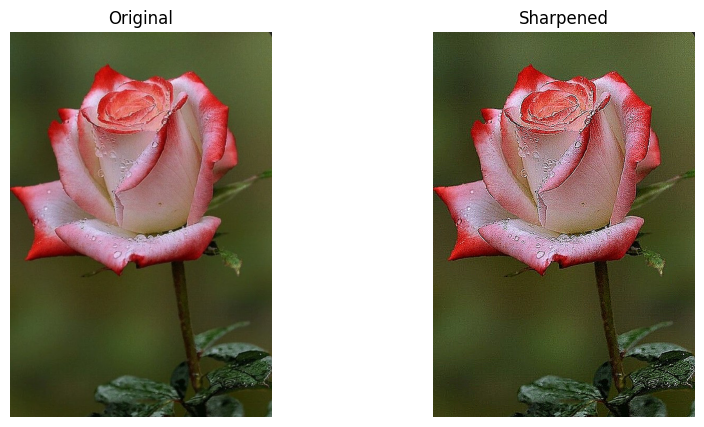

In [7]:
equalized = cv2.equalizeHist(gray)
kernel = np.array([[0, -1, 0], [-1, 5,-1], [0, -1, 0]])
sharpened = cv2.filter2D(img, -1, kernel)

show_images(gray, equalized, "Gray", "Equalized")
show_images(img, sharpened, "Original", "Sharpened")

## 7. Edge Detection
We apply Sobel, Laplacian, and Canny edge detection.

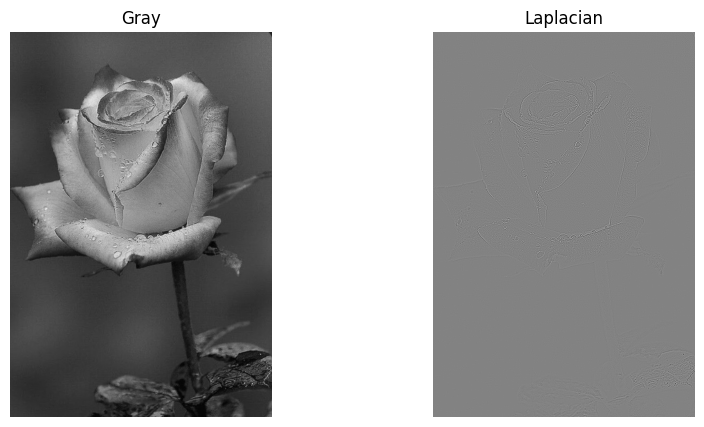

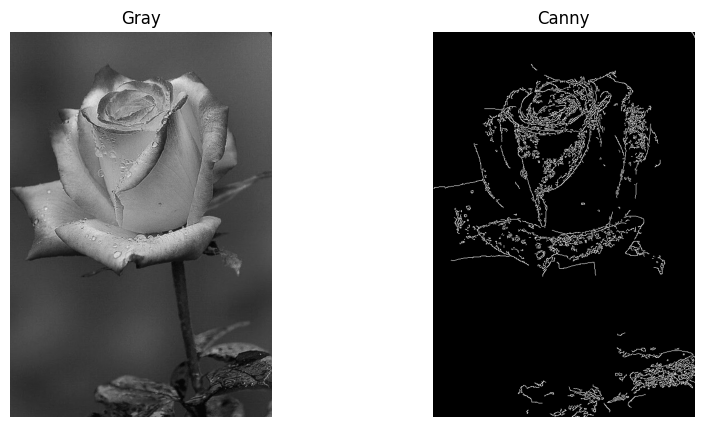

In [8]:
laplacian = cv2.Laplacian(gray, cv2.CV_64F)
canny = cv2.Canny(gray, 100, 200)

show_images(gray, laplacian, "Gray", "Laplacian")
show_images(gray, canny, "Gray", "Canny")

## 8. Compression & File Handling
Save the processed image in different formats and compare file sizes.

In [9]:
cv2.imwrite('output.jpg', img, [int(cv2.IMWRITE_JPEG_QUALITY), 90])
cv2.imwrite('output.png', img)
cv2.imwrite('output.bmp', img)
print("Saved images in JPG, PNG, and BMP formats")

Saved images in JPG, PNG, and BMP formats


## 9. Conclusion
This notebook mirrors the backend logic of the Streamlit GUI (`app.py`).
Each function can be directly linked to the interactive operations available in the GUI.